In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score
from collections import Counter

In [13]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print('Images download done.')

Images download done.


In [14]:
dataset_path = '/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals'
categories = os.listdir(dataset_path)
print("Categories:", categories)

Categories: ['dogs', 'panda', 'cats']


In [15]:
image_paths = []
for category in categories:
    category_dir = os.path.join(dataset_path, category)
    for fname in os.listdir(category_dir):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(category_dir, fname))

In [16]:
random.shuffle(image_paths)
selected_images = image_paths[:100]

plt.figure(figsize=(20, 20))
for i, img_path in enumerate(selected_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(10, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Original Images", fontsize=24)
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

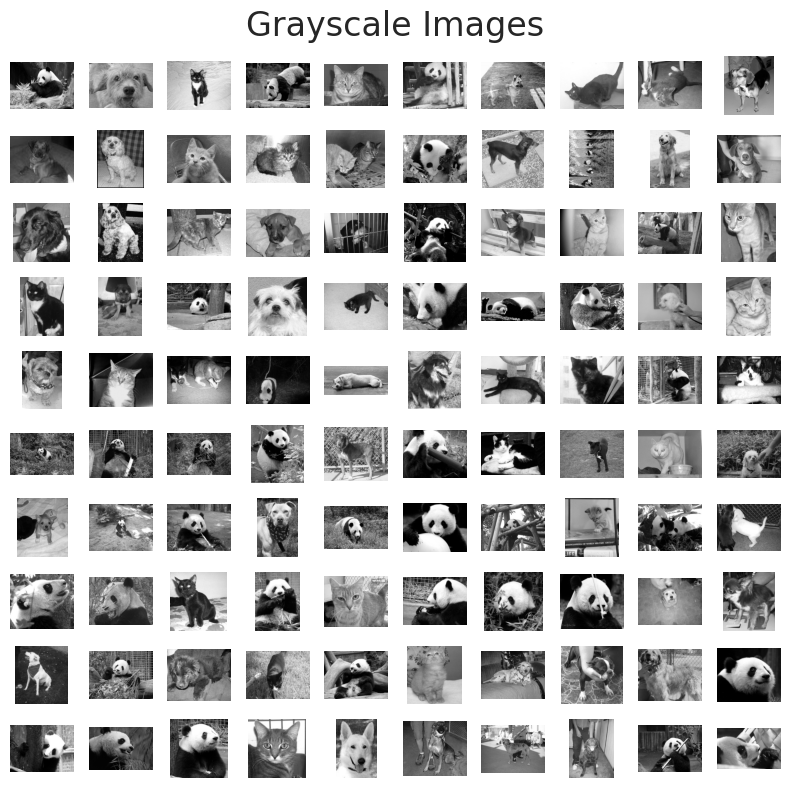

In [17]:
# Convert to grayscale and display
plt.figure(figsize=(8,8))
for i, img_path in enumerate(selected_images):
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(10, 10, i + 1)
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
plt.suptitle("Grayscale Images", fontsize=24)
plt.tight_layout()
plt.show()

In [18]:
label_map = {cat: idx for idx, cat in enumerate(sorted(categories))}

data = []
labels = []

for img_path in selected_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    data.append(img.flatten())

    label_name = os.path.basename(os.path.dirname(img_path))
    labels.append(label_map[label_name])

data = np.array(data)
labels = np.array(labels)

print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of data: (100, 1024)
Shape of labels: (100,)


In [19]:
def compute_distance(x1, x2, distance='l2'):
    if distance == 'l1':
        return np.sum(np.abs(x1 - x2))
    elif distance == 'l2':
        return np.sqrt(np.sum((x1 - x2)**2))

# k-NN prediction
def knn_predict(X_train, y_train, X_test, k=3, distance='l2'):
    distances = []
    for i in range(len(X_train)):
        dist = compute_distance(X_test, X_train[i], distance)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    nearest_labels = [neighbor[1] for neighbor in nearest_neighbors]

    return Counter(nearest_labels).most_common(1)[0][0]

# Cross-validation
def cross_validate(X, y, k=3, distance='l2', folds=5):
    fold_size = len(X) // folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = []

    for fold in range(folds):
        start = fold * fold_size
        end = start + fold_size
        val_idx = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        correct = 0
        for i in range(len(X_val)):
            pred = knn_predict(X_train, y_train, X_val[i], k, distance)
            if pred == y_val[i]:
                correct += 1

        accuracy = correct / len(X_val)
        accuracies.append(accuracy)
        print(f"Fold {fold + 1}: Accuracy = {accuracy:.2f}")

    avg_acc = np.mean(accuracies)
    print(f"Average Accuracy = {avg_acc:.2f}")
    return avg_acc

for k in range(1, 6):
    print(f"\nEvaluating for K = {k} using Manhattan (L1) Distance:")
    cross_validate(data, labels, k=k, distance='l1', folds=5)

    print(f"\nEvaluating for K = {k} using Euclidean (L2) Distance:")
    cross_validate(data, labels, k=k, distance='l2', folds=5)


Evaluating for K = 1 using Manhattan (L1) Distance:
Fold 1: Accuracy = 0.70
Fold 2: Accuracy = 0.30
Fold 3: Accuracy = 0.50
Fold 4: Accuracy = 0.60
Fold 5: Accuracy = 0.35
Average Accuracy = 0.49

Evaluating for K = 1 using Euclidean (L2) Distance:
Fold 1: Accuracy = 0.50
Fold 2: Accuracy = 0.35
Fold 3: Accuracy = 0.40
Fold 4: Accuracy = 0.55
Fold 5: Accuracy = 0.45
Average Accuracy = 0.45

Evaluating for K = 2 using Manhattan (L1) Distance:
Fold 1: Accuracy = 0.40
Fold 2: Accuracy = 0.40
Fold 3: Accuracy = 0.40
Fold 4: Accuracy = 0.60
Fold 5: Accuracy = 0.60
Average Accuracy = 0.48

Evaluating for K = 2 using Euclidean (L2) Distance:
Fold 1: Accuracy = 0.50
Fold 2: Accuracy = 0.30
Fold 3: Accuracy = 0.45
Fold 4: Accuracy = 0.30
Fold 5: Accuracy = 0.50
Average Accuracy = 0.41

Evaluating for K = 3 using Manhattan (L1) Distance:
Fold 1: Accuracy = 0.50
Fold 2: Accuracy = 0.60
Fold 3: Accuracy = 0.55
Fold 4: Accuracy = 0.25
Fold 5: Accuracy = 0.50
Average Accuracy = 0.48

Evaluating for

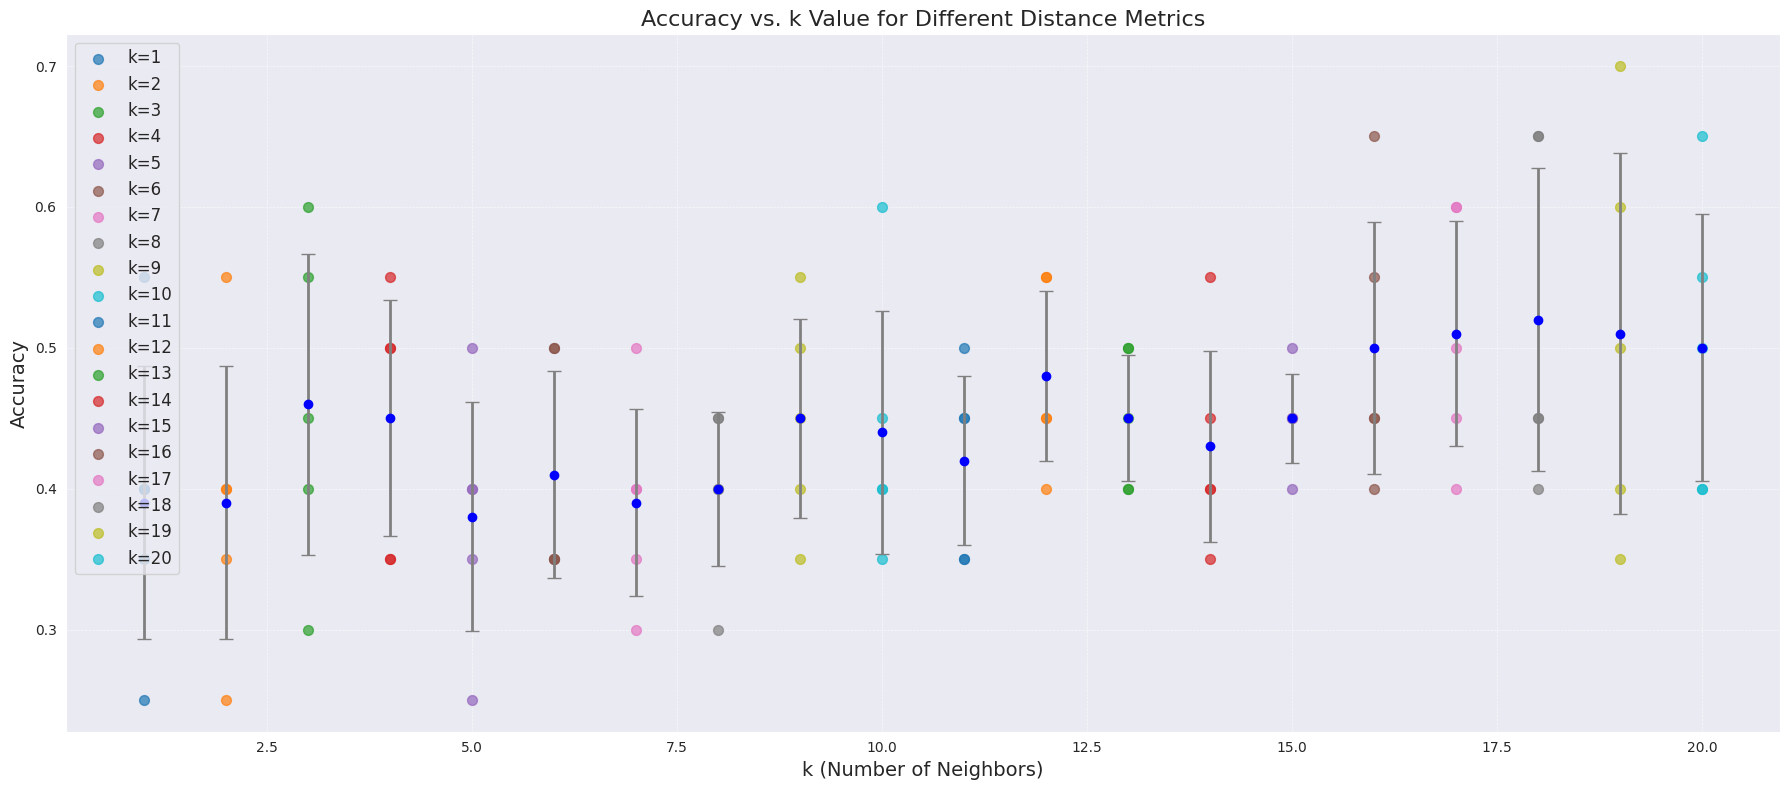

In [20]:
import numpy as np
import random
import os
import cv2
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
def l1_distance(a, b):
    return np.sum(np.abs(a - b))

def l2_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, x_test, k=3, distance='l2'):
    distances = []
    for i in range(len(X_train)):
        dist = l1_distance(x_test, X_train[i]) if distance == 'l1' else l2_distance(x_test, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]

    return Counter(k_nearest_labels).most_common(1)[0][0]

def cross_validate_k_range(X, y, k_values, distance='l2', folds=5):
    fold_size = len(X) // folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    accuracies = {k: [] for k in k_values}

    for fold in range(folds):
        start = fold * fold_size
        end = start + fold_size
        val_idx = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        for k in k_values:
            correct = 0
            for i in range(len(X_val)):
                pred = knn_predict(X_train, y_train, X_val[i], k=k, distance=distance)
                if pred == y_val[i]:
                    correct += 1
            accuracy = correct / len(X_val)
            accuracies[k].append(accuracy)

    return accuracies

def plot_accuracies(accuracies_dict, k_values):
    plt.figure(figsize=(18, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(k_values)))

    for k, fold_accuracies in accuracies_dict.items():
        plt.scatter([k] * len(fold_accuracies), fold_accuracies, alpha=0.7, s=50, label=f'k={k}')
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)
        plt.errorbar(k, mean_acc, yerr=std_acc, fmt='o', color='blue', ecolor='gray', elinewidth=2, capsize=5)

    sns.set_style('darkgrid')
    plt.title('Accuracy vs. k Value for Different Distance Metrics', fontsize=16)
    plt.xlabel('k (Number of Neighbors)', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

k_values = list(range(1, 21))

euclidean_accuracies = cross_validate_k_range(data, labels, k_values, distance='l2', folds=5)

plot_accuracies(euclidean_accuracies, k_values)
